# WordCloud, presidential conferences (México)

## Extract data

In [58]:
from bs4 import BeautifulSoup
import requests

# 19-Feb-2021 Conference URL
# url = 'https://presidente.gob.mx/19-02-21-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/'
# url = 'https://presidente.gob.mx/13-03-21-version-estenografica-proyecto-integral-islas-marias-desde-nayarit/'
# url = 'https://presidente.gob.mx/version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador-50/'
url = 'https://presidente.gob.mx/04-05-21-version-estenografica-de-la-conferencia-de-prensa-matutina-del-presidente-andres-manuel-lopez-obrador/'

res_request = requests.get(url)

In [59]:
soup = BeautifulSoup(res_request.text, 'html.parser')

In [60]:
# Extract the text and speakers
soup1 = soup.select("div p")
soup1

[<p style="text-align: right;"><em>2021: Año de la Independencia</em></p>,
 <p> </p>,
 <p><strong>PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:</strong> Buenos días.</p>,
 <p>El día de hoy vamos a informar sobre el lamentable accidente en la Línea 12 del Metro, que costó la vida a varias personas, ahora va a informar sobre el número de fallecidos y heridos la jefa de Gobierno, Claudia Sheinbaum. Es una triste noticia. Enviamos nuestro pésame a los familiares de las víctimas de este accidente.</p>,
 <p>Y la postura del gobierno de la ciudad la respalda el gobierno federal acerca de lo que procede en este lamentable caso. De modo que la doctora Claudia Sheinbaum, jefa de Gobierno de la Ciudad de México, va a informar.</p>,
 <p><audio controls="controls" src="http://presidente.gob.mx/wp-content/uploads/2021/05/2021-05-04-Matutina.mp3"></audio></p>,
 <p><iframe allowfullscreen="allowfullscreen" height="400" src="//www.youtube.com/embed/iHmnWzzqzm0?t=184" width="600"></iframe></p>,
 <p>Terminando

In [63]:
# Analize and complete the names of speakers
# Second try to get better info

import numpy as np 

speaker = []
current_speaker = np.nan

for i in soup1:
        #if i.b:
        if i.strong:
            #speaker.append(i.b.text)
            #current_speaker = i.b.text
            speaker.append(i.strong.text)
            current_speaker = i.strong.text
        else:
            speaker.append(current_speaker)
len(speaker)

380

In [64]:
speaker

[nan,
 nan,
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIER

In [65]:
# Count speech rows
speech = [i.text for i in soup1]
len(speech)

380

In [66]:
# Create a dataframe with speakers and speech

import pandas as pd

dfa = pd.DataFrame(
                    {
                        "speaker" : speaker,
                        "speech" : speech
                    })
dfa

,speaker,speech
0,NaN,2021: Año de la Independencia
1,NaN,
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Y la postura del gobierno de la ciudad la resp...
...,...,...
375,Andrés Manuel López Obrador,Presidente de México
376,Andrés Manuel López Obrador,t. 5093 4900
377,Andrés Manuel López Obrador,t. 01800 080 1127
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [170]:
dfa2['speaker'][13]

'INTERLOCUTORA:'

In [169]:
dfa2['speech'][13]

'Parte de esas obras que desgraciadamente, desafortunadamente no es la única, es el Tren Toluca a la Ciudad de México que se estimó en 20 mil millones de pesos de manera original, fue creciendo la cantidad. Y ahora para concluirlo se necesitan alrededor de 15 mil millones adicionales más lo ya invertido. En total costaría 65 mil millones de pesos lo que se estimó en 20, 25 mil millones.'

In [111]:
dfa=dfa2

In [8]:
# Analize and complete the names of speakers

import numpy as np 

speaker = []
current_speaker = np.nan

for i in soup1:
        if i.strong:
            speaker.append(i.strong.text)
            current_speaker = i.strong.text
        else:
            speaker.append(current_speaker)
len(speaker)

380

In [9]:
speaker

[nan,
 nan,
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIER

In [10]:
set_speakers = set(speaker)
set_speakers

{'(CANCELACIÓN DE TIMBRE POSTAL)',
 'ARTURO REYES SANDOVAL, DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO NACIONAL (IPN):',
 'ARTURO REYES SANDOVAL:',
 'ARTURO REYES SANDOVAL: ',
 'Andrés Manuel López Obrador',
 'CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP):',
 'CINTHIA RIVERO BARRANCO, ENFERMERA: ',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: ',
 'CLAUDIA SHEINBAUM PARDO:',
 'CLAUDIA SHEINBAUM PARDO: ',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD:',
 'HUGO LÓPEZ-GATELL RAMÍREZ:',
 'INTERLOCUTOR:',
 'INTERLOCUTORA:',
 'INTERVENCIÓN HOMBRE:',
 'INTERVENCIÓN MUJER:',
 'INTERVENCIÓN:',
 'JESÚS RAMÍREZ CUEVAS, COORDINADOR GENERAL DE COMUNICACIÓN SOCIAL Y VOCERO DE LA PRESIDENCIA:',
 'JESÚS RAMÍREZ CUEVAS:',
 'JORGE ALCOCER VARELA, SECRETARIO DE SALUD:',
 'LUCIANO CONCHEIRO BÓRQUEZ, SUBSECRETARIO DE EDUCACIÓN SUPERIOR, SEP:',
 'LUCIANO CONCHEIRO BÓRQUEZ:',
 'LUIS CRE

In [11]:
# Count speech rows
speech = [i.text for i in soup1]
len(speech)

380

In [12]:
# Create a dataframe with speakers and speech

import pandas as pd

dfa = pd.DataFrame(
                    {
                        "speaker" : speaker,
                        "speech" : speech
                    })
dfa

,speaker,speech
0,NaN,2021: Año de la Independencia
1,NaN,
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Y la postura del gobierno de la ciudad la resp...
...,...,...
375,Andrés Manuel López Obrador,Presidente de México
376,Andrés Manuel López Obrador,t. 5093 4900
377,Andrés Manuel López Obrador,t. 01800 080 1127
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [13]:
dfa['speaker'][12]

'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO: '

In [14]:
dfa['speech'][11]

'Al momento llegamos al lugar, llegó también la secretaria de Seguridad Pública y Protección Ciudadana del Gobierno de México, la coordinadora de Protección Civil del Gobierno de México; estuvo ahí también la Sedena, el comandante regional y de la 1ª Zona Militar, Marina con sus rescatistas, la Guardia Nacional; y del gobierno de la ciudad, como siempre el Heroico Cuerpo de Bomberos, Protección Civil, la Secretaría de Seguridad Ciudadana, Secretaría de Gobierno.'

In [15]:
# Delete empty rows (without speakers: titles or dates)
dfa = dfa.dropna()
dfa.head()

,speaker,speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR: Buenos...
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,Y la postura del gobierno de la ciudad la resp...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR:,


In [67]:
# Get names of indexes for which column it's not a speech
indexNames = dfa[ dfa['speech'].str.contains('Copyright Derechos Reservados') ].index

dfb = dfa.copy()
# Delete these row indexes from dataFrame
dfb.drop(indexNames , inplace=True )

In [68]:
# Get names of indexes for which column it's not a speech
indexNames = dfb[ dfb['speech'] == '+++++' ].index

dfc = dfb.copy()

# Delete these row indexes from dataFrame
dfc.drop(indexNames , inplace=True)

In [18]:
# Get names of indexes for which column it's not a speech
indexNames = dfc[ dfc['speech'].str.lower().str.contains('inaudible')].index

dfd = dfc.copy()

# Delete these row indexes from dataFrame
dfd.drop(indexNames , inplace=True)

In [69]:
dfd

,speaker,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
...,...,...
375,Andrés Manuel López Obrador,Presidente de México
376,Andrés Manuel López Obrador,t. 5093 4900
377,Andrés Manuel López Obrador,t. 01800 080 1127
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [70]:
dfd['speaker'] = dfd['speaker'].str.replace(':', '').str.strip()
dfd


,speaker,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
...,...,...
375,Andrés Manuel López Obrador,Presidente de México
376,Andrés Manuel López Obrador,t. 5093 4900
377,Andrés Manuel López Obrador,t. 01800 080 1127
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [71]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR                                                                              78
CLAUDIA SHEINBAUM PARDO                                                                                             40
INTERLOCUTOR                                                                                                        35
MARCELO EBRARD CASAUBON                                                                                             30
PREGUNTA                                                                                                            26
HUGO LÓPEZ-GATELL RAMÍREZ                                                                                           25
LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL                                                 24
HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD                                      19
CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA 

In [72]:
# Split speaker into speaker name and job title
if dfd.speaker.str.contains(',').all():
    dfd[['speaker','job']] = dfd.speaker.str.split(',', expand=True)
else:
    dfd[['job']] = ''
dfd


,speaker,clean_speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.,
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...,
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...,
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
...,...,...,...
375,Andrés Manuel López Obrador,Presidente de México,
376,Andrés Manuel López Obrador,t. 5093 4900,
377,Andrés Manuel López Obrador,t. 01800 080 1127,
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",


In [73]:
dfd['speaker'].value_counts()

PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR                                                                              78
CLAUDIA SHEINBAUM PARDO                                                                                             40
INTERLOCUTOR                                                                                                        35
MARCELO EBRARD CASAUBON                                                                                             30
PREGUNTA                                                                                                            26
HUGO LÓPEZ-GATELL RAMÍREZ                                                                                           25
LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL                                                 24
HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD                                      19
CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA 

In [74]:
dfd['job'].value_counts()

    377
Name: job, dtype: int64

In [75]:
dfd['speaker'] = dfd['speaker'].str.strip()
dfd

,speaker,clean_speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.,
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...,
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...,
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
...,...,...,...
375,Andrés Manuel López Obrador,Presidente de México,
376,Andrés Manuel López Obrador,t. 5093 4900,
377,Andrés Manuel López Obrador,t. 01800 080 1127,
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",


In [76]:
dfd['job'] = dfd['job'].str.strip()
dfd

,speaker,clean_speech,job
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.,
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...,
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...,
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,
...,...,...,...
375,Andrés Manuel López Obrador,Presidente de México,
376,Andrés Manuel López Obrador,t. 5093 4900,
377,Andrés Manuel López Obrador,t. 01800 080 1127,
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",


In [77]:
dfd['job'].value_counts()

    377
Name: job, dtype: int64

In [78]:
# Get a set from speakers and jobs:

unique_speakers = set(dfd['speaker'])

unique_jobs = set(dfd['job'])
print(unique_speakers, unique_jobs)

{'CINTHIA RIVERO BARRANCO, ENFERMERA', 'LUCIANO CONCHEIRO BÓRQUEZ', 'INTERLOCUTORA', 'JESÚS RAMÍREZ CUEVAS', 'Andrés Manuel López Obrador', 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO', 'INTERLOCUTOR', 'MARCELO EBRARD CASAUBON, SECRETARIO DE RELACIONES EXTERIORES', 'ARTURO REYES SANDOVAL, DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO NACIONAL (IPN)', 'CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP)', 'HUGO LÓPEZ-GATELL RAMÍREZ', 'JESÚS RAMÍREZ CUEVAS, COORDINADOR GENERAL DE COMUNICACIÓN SOCIAL Y VOCERO DE LA PRESIDENCIA', 'ARTURO REYES SANDOVAL', 'JORGE ALCOCER VARELA, SECRETARIO DE SALUD', 'LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL', 'PREGUNTA', 'INTERVENCIÓN MUJER', 'INTERVENCIÓN HOMBRE', 'CLAUDIA SHEINBAUM PARDO', 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'MARCO ANTONIO CANTÚ CUEVAS, SECRETARIO DE SALUD DE MORELOS', 'MARCELO EBRARD CASAUBON', 'LUCIANO CONCHEIRO BÓRQUEZ, SUBS

In [79]:
list_unique_speakers = list(unique_speakers)
list_unique_speakers 

['CINTHIA RIVERO BARRANCO, ENFERMERA',
 'LUCIANO CONCHEIRO BÓRQUEZ',
 'INTERLOCUTORA',
 'JESÚS RAMÍREZ CUEVAS',
 'Andrés Manuel López Obrador',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO',
 'INTERLOCUTOR',
 'MARCELO EBRARD CASAUBON, SECRETARIO DE RELACIONES EXTERIORES',
 'ARTURO REYES SANDOVAL, DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO NACIONAL (IPN)',
 'CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP)',
 'HUGO LÓPEZ-GATELL RAMÍREZ',
 'JESÚS RAMÍREZ CUEVAS, COORDINADOR GENERAL DE COMUNICACIÓN SOCIAL Y VOCERO DE LA PRESIDENCIA',
 'ARTURO REYES SANDOVAL',
 'JORGE ALCOCER VARELA, SECRETARIO DE SALUD',
 'LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL',
 'PREGUNTA',
 'INTERVENCIÓN MUJER',
 'INTERVENCIÓN HOMBRE',
 'CLAUDIA SHEINBAUM PARDO',
 'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR',
 'MARCO ANTONIO CANTÚ CUEVAS, SECRETARIO DE SALUD DE MORELOS',
 'MARCELO EBRARD CASAUBON',
 'LUCIANO C

In [80]:
list_unique_jobs = list(unique_jobs)
list_unique_jobs

['']

In [81]:
# Order list. Necesary because...
# ...have to remove first'INTERLOCUTORA' before 'INTERLOCUTOR' or an letter 'A' is don't erased.
list_unique_speakers.sort(reverse=True)

# Erase None from the list of jobs
list_unique_jobs = list(filter(None, list_unique_jobs)) 
list_unique_jobs.sort(reverse=True)

print (list_unique_speakers, list_unique_jobs)

['PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR', 'PREGUNTA', 'MARCO ANTONIO CANTÚ CUEVAS, SECRETARIO DE SALUD DE MORELOS', 'MARCELO EBRARD CASAUBON, SECRETARIO DE RELACIONES EXTERIORES', 'MARCELO EBRARD CASAUBON', 'LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL', 'LUCIANO CONCHEIRO BÓRQUEZ, SUBSECRETARIO DE EDUCACIÓN SUPERIOR, SEP', 'LUCIANO CONCHEIRO BÓRQUEZ', 'JORGE ALCOCER VARELA, SECRETARIO DE SALUD', 'JESÚS RAMÍREZ CUEVAS, COORDINADOR GENERAL DE COMUNICACIÓN SOCIAL Y VOCERO DE LA PRESIDENCIA', 'JESÚS RAMÍREZ CUEVAS', 'INTERVENCIÓN MUJER', 'INTERVENCIÓN HOMBRE', 'INTERVENCIÓN', 'INTERLOCUTORA', 'INTERLOCUTOR', 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD', 'HUGO LÓPEZ-GATELL RAMÍREZ', 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO', 'CLAUDIA SHEINBAUM PARDO', 'CINTHIA RIVERO BARRANCO, ENFERMERA', 'CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP)', 'An

In [82]:
# Create dict with strings to erase
dict = {}

# Add unique speakers and jobs to the dict

for sp in list_unique_speakers:
    dict[sp] = ''
    
for sp in list_unique_jobs:
    dict[sp] = ''
    
dict

{'PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR': '',
 'PREGUNTA': '',
 'MARCO ANTONIO CANTÚ CUEVAS, SECRETARIO DE SALUD DE MORELOS': '',
 'MARCELO EBRARD CASAUBON, SECRETARIO DE RELACIONES EXTERIORES': '',
 'MARCELO EBRARD CASAUBON': '',
 'LUIS CRESENCIO SANDOVAL GONZÁLEZ, SECRETARIO DE LA DEFENSA NACIONAL': '',
 'LUCIANO CONCHEIRO BÓRQUEZ, SUBSECRETARIO DE EDUCACIÓN SUPERIOR, SEP': '',
 'LUCIANO CONCHEIRO BÓRQUEZ': '',
 'JORGE ALCOCER VARELA, SECRETARIO DE SALUD': '',
 'JESÚS RAMÍREZ CUEVAS, COORDINADOR GENERAL DE COMUNICACIÓN SOCIAL Y VOCERO DE LA PRESIDENCIA': '',
 'JESÚS RAMÍREZ CUEVAS': '',
 'INTERVENCIÓN MUJER': '',
 'INTERVENCIÓN HOMBRE': '',
 'INTERVENCIÓN': '',
 'INTERLOCUTORA': '',
 'INTERLOCUTOR': '',
 'HUGO LÓPEZ-GATELL RAMÍREZ, SUBSECRETARIO DE PREVENCIÓN Y PROMOCIÓN DE LA SALUD': '',
 'HUGO LÓPEZ-GATELL RAMÍREZ': '',
 'CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO': '',
 'CLAUDIA SHEINBAUM PARDO': '',
 'CINTHIA RIVERO BARRANCO, ENFERMERA': '',
 'CARMEN ENEDIN

In [83]:
# Erase the speakers and jobs from the speech

serie_tmp = dfd['speech'].replace(dict, regex=True)
serie_tmp

KeyError: 'speech'

In [84]:
# Convert serie to dataframe
df_tmp = serie_tmp.to_frame('clean_speech')

df_tmp

,clean_speech
2,: Buenos días.
3,El día de hoy vamos a informar sobre el lament...
4,Y la postura del gobierno de la ciudad la resp...
5,
6,
...,...
375,Presidente de México
376,t. 5093 4900
377,t. 01800 080 1127
378,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [85]:
# Concat the dataframe
dfd = pd.concat([dfd, df_tmp], axis=1)
dfd


,speaker,clean_speech,job,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.,,: Buenos días.
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...,,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...,,Y la postura del gobierno de la ciudad la resp...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,,,
...,...,...,...,...
375,Andrés Manuel López Obrador,Presidente de México,,Presidente de México
376,Andrés Manuel López Obrador,t. 5093 4900,,t. 5093 4900
377,Andrés Manuel López Obrador,t. 01800 080 1127,,t. 01800 080 1127
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit...",,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [86]:
dir_pandas = '../notebook/{}'
dfd.to_json(dir_pandas.format('test.json'))


ValueError: DataFrame columns must be unique for orient='columns'.

In [88]:
dfd.to_csv(dir_pandas.format('test.csv'), index = False)

In [38]:
# Delete dirty and temporal columns 
dfd = dfd.drop(columns=['speech','job'])
dfd

,speaker,clean_speech
2,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,: Buenos días.
3,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,El día de hoy vamos a informar sobre el lament...
4,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,Y la postura del gobierno de la ciudad la resp...
5,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
6,PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR,
...,...,...
375,Andrés Manuel López Obrador,Presidente de México
376,Andrés Manuel López Obrador,t. 5093 4900
377,Andrés Manuel López Obrador,t. 01800 080 1127
378,Andrés Manuel López Obrador,"Puerta 8 Palacio Nacional, Plaza de la Constit..."


In [39]:
# Group speech by speaker

tmp = dfd.groupby(['speaker'])['clean_speech'].apply(' '.join)
tmp

speaker
(CANCELACIÓN DE TIMBRE POSTAL)                                                                                                                                     ()
ARTURO REYES SANDOVAL                                                                                               : Así es, señor presidente, iniciamos el día d...
ARTURO REYES SANDOVAL, DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO NACIONAL (IPN)                                    , DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO N...
Andrés Manuel López Obrador                                                                                          Presidente de México t. 5093 4900 t. 01800 08...
CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP)    CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GE...
CINTHIA RIVERO BARRANCO, ENFERMERA                                                                                  : Buenos días, maestra María. Mi nombre es Cin

In [40]:
# Convert serie to dataframe
dfe = tmp.to_frame()

dfe

,clean_speech
speaker,
(CANCELACIÓN DE TIMBRE POSTAL),()
ARTURO REYES SANDOVAL,": Así es, señor presidente, iniciamos el día d..."
"ARTURO REYES SANDOVAL, DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO NACIONAL (IPN)",", DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO N..."
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
"CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP)","CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GE..."
"CINTHIA RIVERO BARRANCO, ENFERMERA",": Buenos días, maestra María. Mi nombre es Cin..."
CLAUDIA SHEINBAUM PARDO,: Todos los días se lleva a cabo un proceso de...
"CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO",": Muy buenos días. Gracias, presidente. El día..."
HUGO LÓPEZ-GATELL RAMÍREZ,: Con mucho gusto. Gracias por la pregunta por...


## Using nltk


In [41]:
# Using nltk

import nltk
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fertorresmx/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# Using stopwords

from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

stop_words_es

['a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

In [43]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [44]:
# Add stopwords in spanish
stop_words = ["entonces", "vamos", "pues", "va", "aquí", "si"] + stop_words_es #Adding aditional StopWords

print(stop_words)

['entonces', 'vamos', 'pues', 'va', 'aquí', 'si', 'a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fue

In [45]:
dfe

,clean_speech
speaker,
(CANCELACIÓN DE TIMBRE POSTAL),()
ARTURO REYES SANDOVAL,": Así es, señor presidente, iniciamos el día d..."
"ARTURO REYES SANDOVAL, DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO NACIONAL (IPN)",", DIRECTOR GENERAL DEL INSTITUTO POLITÉCNICO N..."
Andrés Manuel López Obrador,Presidente de México t. 5093 4900 t. 01800 08...
"CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GENERAL DE EDUCACIÓN SUPERIOR. SECRETARÍA DE EDUCACIÓN PÚBLICA (SEP)","CARMEN ENEDINA RODRÍGUEZ ARMENTA, DIRECTORA GE..."
"CINTHIA RIVERO BARRANCO, ENFERMERA",": Buenos días, maestra María. Mi nombre es Cin..."
CLAUDIA SHEINBAUM PARDO,: Todos los días se lleva a cabo un proceso de...
"CLAUDIA SHEINBAUM PARDO, JEFA DE GOBIERNO DE LA CIUDAD DE MÉXICO",": Muy buenos días. Gracias, presidente. El día..."
HUGO LÓPEZ-GATELL RAMÍREZ,: Con mucho gusto. Gracias por la pregunta por...


In [46]:
# Take the speech from president

text = dfe.loc['PRESIDENTE ANDRÉS MANUEL LÓPEZ OBRADOR'][0]
text

': Buenos días. El día de hoy vamos a informar sobre el lamentable accidente en la Línea 12 del Metro, que costó la vida a varias personas, ahora va a informar sobre el número de fallecidos y heridos la jefa de Gobierno, Claudia Sheinbaum. Es una triste noticia. Enviamos nuestro pésame a los familiares de las víctimas de este accidente. Y la postura del gobierno de la ciudad la respalda el gobierno federal acerca de lo que procede en este lamentable caso. De modo que la doctora Claudia Sheinbaum, jefa de Gobierno de la Ciudad de México, va a informar.   Terminando sobre este lamentable caso, vamos a reiniciar la conferencia con el Pulso de la Salud, lo que siempre hacemos los martes, para informar sobre la pandemia y el Plan Nacional de Vacunación, y vamos posteriormente a abrir a las preguntas y las respuestas. Muy bien, le damos la palabra a Claudia. : Bueno, si les parece, podemos tratar este tema o continuamos, como ustedes decidan. Sobre el tema. : Sí. : Muy bien. Pues vamos a seg

In [47]:
# Tokenise the data set
from nltk.tokenize import sent_tokenize, word_tokenize

words = word_tokenize(text)
print(words)

[':', 'Buenos', 'días', '.', 'El', 'día', 'de', 'hoy', 'vamos', 'a', 'informar', 'sobre', 'el', 'lamentable', 'accidente', 'en', 'la', 'Línea', '12', 'del', 'Metro', ',', 'que', 'costó', 'la', 'vida', 'a', 'varias', 'personas', ',', 'ahora', 'va', 'a', 'informar', 'sobre', 'el', 'número', 'de', 'fallecidos', 'y', 'heridos', 'la', 'jefa', 'de', 'Gobierno', ',', 'Claudia', 'Sheinbaum', '.', 'Es', 'una', 'triste', 'noticia', '.', 'Enviamos', 'nuestro', 'pésame', 'a', 'los', 'familiares', 'de', 'las', 'víctimas', 'de', 'este', 'accidente', '.', 'Y', 'la', 'postura', 'del', 'gobierno', 'de', 'la', 'ciudad', 'la', 'respalda', 'el', 'gobierno', 'federal', 'acerca', 'de', 'lo', 'que', 'procede', 'en', 'este', 'lamentable', 'caso', '.', 'De', 'modo', 'que', 'la', 'doctora', 'Claudia', 'Sheinbaum', ',', 'jefa', 'de', 'Gobierno', 'de', 'la', 'Ciudad', 'de', 'México', ',', 'va', 'a', 'informar', '.', 'Terminando', 'sobre', 'este', 'lamentable', 'caso', ',', 'vamos', 'a', 'reiniciar', 'la', 'confer

In [48]:
# Removes punctuation and numbers

wordsFiltered = [word.lower() for word in words if word.isalpha()]
print(wordsFiltered)


['buenos', 'días', 'el', 'día', 'de', 'hoy', 'vamos', 'a', 'informar', 'sobre', 'el', 'lamentable', 'accidente', 'en', 'la', 'línea', 'del', 'metro', 'que', 'costó', 'la', 'vida', 'a', 'varias', 'personas', 'ahora', 'va', 'a', 'informar', 'sobre', 'el', 'número', 'de', 'fallecidos', 'y', 'heridos', 'la', 'jefa', 'de', 'gobierno', 'claudia', 'sheinbaum', 'es', 'una', 'triste', 'noticia', 'enviamos', 'nuestro', 'pésame', 'a', 'los', 'familiares', 'de', 'las', 'víctimas', 'de', 'este', 'accidente', 'y', 'la', 'postura', 'del', 'gobierno', 'de', 'la', 'ciudad', 'la', 'respalda', 'el', 'gobierno', 'federal', 'acerca', 'de', 'lo', 'que', 'procede', 'en', 'este', 'lamentable', 'caso', 'de', 'modo', 'que', 'la', 'doctora', 'claudia', 'sheinbaum', 'jefa', 'de', 'gobierno', 'de', 'la', 'ciudad', 'de', 'méxico', 'va', 'a', 'informar', 'terminando', 'sobre', 'este', 'lamentable', 'caso', 'vamos', 'a', 'reiniciar', 'la', 'conferencia', 'con', 'el', 'pulso', 'de', 'la', 'salud', 'lo', 'que', 'siempr

In [49]:
# Remove stop words from tokenised data set

filtered_words = [word for word in wordsFiltered if word not in stop_words]
print(filtered_words)

['buenos', 'días', 'día', 'hoy', 'informar', 'lamentable', 'accidente', 'línea', 'metro', 'costó', 'vida', 'varias', 'personas', 'ahora', 'informar', 'número', 'fallecidos', 'heridos', 'jefa', 'gobierno', 'claudia', 'sheinbaum', 'triste', 'noticia', 'enviamos', 'pésame', 'familiares', 'víctimas', 'accidente', 'postura', 'gobierno', 'ciudad', 'respalda', 'gobierno', 'federal', 'acerca', 'procede', 'lamentable', 'caso', 'modo', 'doctora', 'claudia', 'sheinbaum', 'jefa', 'gobierno', 'ciudad', 'méxico', 'informar', 'terminando', 'lamentable', 'caso', 'reiniciar', 'conferencia', 'pulso', 'salud', 'siempre', 'hacemos', 'martes', 'informar', 'pandemia', 'plan', 'nacional', 'vacunación', 'posteriormente', 'abrir', 'preguntas', 'respuestas', 'bien', 'damos', 'palabra', 'claudia', 'bueno', 'parece', 'podemos', 'tratar', 'tema', 'continuamos', 'ustedes', 'decidan', 'tema', 'bien', 'seguir', 'informando', 'mencionó', 'jefa', 'gobierno', 'claudia', 'sheinbaum', 'hoy', 'mañana', 'informarse', 'datos

In [50]:
!pwd

/Users/fertorresmx/projects/scraping-conferencias/notebook


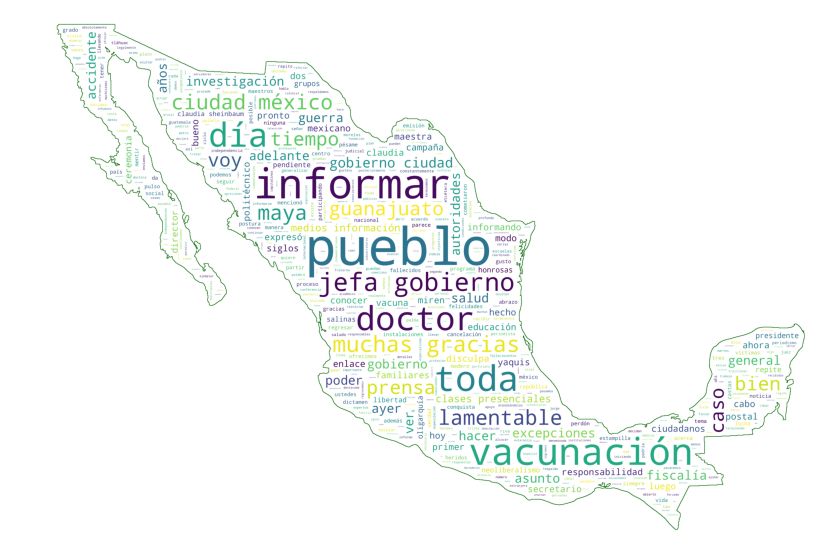

In [54]:
import os
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import datetime

now = datetime.datetime.now().strftime('%Y_%m_%dT%H_%M_%S')

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

map_mask = np.array(Image.open('./images/mask_mexico.png'))

wc = WordCloud(max_words=3000, margin=10, background_color='white',
scale=3, relative_scaling = 0.5, width=400, height=300, mask=map_mask,
random_state=1, stopwords=stop_words, contour_width=3, contour_color='darkgreen')

wc.generate(' '.join(filtered_words))

# store to file
wc.to_file(path.join(d, './images/saved_images/wordcloud_' + now + '.png') )

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [55]:
import collections

#filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

In [56]:
for i, word in enumerate(words):
    print(words[i] + ": " + str(counts[i]))


gobierno: 16
pueblo: 14
informar: 9
vacunación: 9
gracias: 9
ciudad: 8
méxico: 8
muchas: 8
jefa: 7
doctor: 7


<BarContainer object of 10 artists>

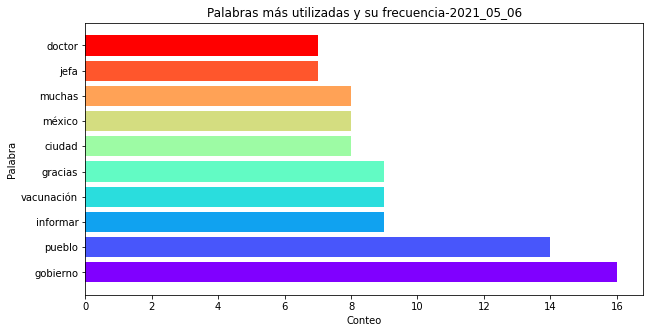

In [57]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import datetime

from matplotlib import rcParams

colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 10, 5

now = datetime.datetime.now().strftime('%Y_%m_%d')
plt.title('Palabras más utilizadas y su frecuencia-' + now)
plt.xlabel('Conteo')
plt.ylabel('Palabra')
plt.barh(words, counts, color=colors)